In [1]:
import pandas as pd
import numpy as np
import json
import warnings
import matplotlib as mlp
import matplotlib.pyplot as plt
import timeit


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [2]:
with open('hh_ru1.json', 'r') as file:
    json_data = json.load(file)

In [3]:
df = pd.json_normalize(json_data)
df = df.drop([
    'relations', 'working_days','addition_info.specializations',

    'accept_incomplete_resumes','accept_temporary', 'adv_context', 'adv_response_url', 'alternate_url', 'apply_alternate_url', 'archived',
    'contacts', 'department', 'has_test', 'insider_interview', 'is_adv_vacancy', 'premium', 'sort_point_distance', 'response_letter_required',
    'response_url', 'show_logo_in_search', 'url','working_time_intervals','working_time_modes',    
    'addition_info.accept_handicapped', 'addition_info.accept_incomplete_resumes','addition_info.accept_kids','addition_info.accept_temporary',
    'addition_info.address.building','addition_info.address.description','addition_info.address.lat','addition_info.address.lng','addition_info.address.metro',
    'addition_info.address.metro_stations','addition_info.allow_messages','addition_info.address.street', 'addition_info.alternate_url',
    'addition_info.apply_alternate_url','addition_info.approved','addition_info.archived','addition_info.area.id',
    'addition_info.area.url', 'addition_info.billing_type.id' ,'addition_info.code','addition_info.contacts','addition_info.created_at',
    'addition_info.department','addition_info.driver_license_types', 'addition_info.driver_license_types','addition_info.employer.alternate_url',
    'addition_info.employer.id','addition_info.employer.logo_urls.240','addition_info.employer.logo_urls.90','addition_info.employer.logo_urls.original',
    'addition_info.employer.trusted', 'addition_info.employer.url', 'addition_info.employer.vacancies_url','addition_info.employment.id', 
    'addition_info.experience.name','addition_info.has_test','addition_info.hidden','addition_info.id','addition_info.initial_created_at',
    'addition_info.insider_interview','addition_info.negotiations_url', 'addition_info.premium','addition_info.published_at','addition_info.quick_responses_allowed',
    'addition_info.relations','addition_info.response_letter_required', 'addition_info.response_url','addition_info.salary', 'addition_info.schedule.id',
    'addition_info.suitable_resumes_url','addition_info.test', 'addition_info.type.id', 'addition_info.type.name','addition_info.vacancy_constructor_template',
    'addition_info.working_time_intervals','addition_info.working_days','addition_info.working_time_modes','address.building','address.description',
    'address.id','address.lat','address.lng','address.metro','address.metro_stations','address.street','area.id','area.url','employer.alternate_url',
    'employer.id','employer.logo_urls.240','employer.logo_urls.90','employer.logo_urls.original','employer.trusted','type.id','type.name',
    'employer.url','employer.vacancies_url','employment.id','employment.name','experience.id',
    'addition_info.salary.from','addition_info.salary.gross','schedule.id','address','addition_info.address','addition_info.address.metro.lat','addition_info.address.metro.line_id',
    'addition_info.address.metro.lng','addition_info.address.metro.station_id','addition_info.address.metro.station_name','addition_info.department.id',
    'address.metro.lat','address.metro.line_id','address.metro.line_name','address.metro.lng','address.metro.station_id',
    'addition_info.salary.to','addition_info.salary.currency','addition_info.schedule.name', 'salary', 'addition_info.employer.accredited_it_employer',
    'addition_info.address.metro.line_name','addition_info.department.name','branding.tariff','department.id','addition_info.insider_interview.id',
    'addition_info.insider_interview.url','insider_interview.id','insider_interview.url','addition_info.vacancy_constructor_template.bottom_picture',
    'addition_info.vacancy_constructor_template.id','addition_info.vacancy_constructor_template.name','addition_info.vacancy_constructor_template.top_picture.blurred_path',
    'addition_info.vacancy_constructor_template.top_picture.height','addition_info.vacancy_constructor_template.top_picture.path','addition_info.vacancy_constructor_template.top_picture.width',
    'addition_info.employer.logo_urls','employer.logo_urls','addition_info.vacancy_constructor_template.bottom_picture.blurred_path','addition_info.vacancy_constructor_template.bottom_picture.height',
    'addition_info.vacancy_constructor_template.bottom_picture.path','addition_info.vacancy_constructor_template.bottom_picture.width','brand_snippet.background.color','brand_snippet.background.gradient',
    'brand_snippet.logo','brand_snippet.logo_scalable.default.height','brand_snippet.logo_scalable.default.url','brand_snippet.logo_scalable.default.width',
    'brand_snippet.logo_scalable.xs.height','brand_snippet.logo_scalable.xs.url','brand_snippet.logo_scalable.xs.width','brand_snippet.logo_xs',
    'brand_snippet.picture','brand_snippet.picture_scalable.default.height','brand_snippet.picture_scalable.default.url',
    'brand_snippet.picture_scalable.xs.height','brand_snippet.picture_scalable.xs.url', 'brand_snippet.picture_scalable.xs.width','brand_snippet.picture_xs',
    'addition_info.test.required','addition_info.video_vacancy.cover_picture.resized_height','addition_info.video_vacancy.cover_picture.resized_path','addition_info.video_vacancy.cover_picture.resized_width',
    'brand_snippet.picture_scalable.default.width','addition_info.video_vacancy.video_url',
    'addition_info.billing_type.name', 'addition_info.address.city', 'addition_info.address.raw','addition_info.area.name','experience.name',
    'address.raw',
    'created_at',
    'published_at',
    'addition_info.name',
], axis=1)
df.set_index('id')

df.head()

,id,name,professional_roles,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,addition_info.key_skills,addition_info.languages,addition_info.professional_roles,address.city,area.name,employer.accredited_it_employer,employer.name,salary.currency,salary.from,salary.gross,salary.to,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name
0,106197099,C++ developer with relocation to Berlin,"[{'id': '96', 'name': 'Программист, разработчи...",<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,"[{'name': 'C/C++'}, {'name': 'Английский язык'}]",[],"[{'id': '96', 'name': 'Программист, разработчи...",Берлин,Санкт-Петербург,False,think-cell,EUR,7500.0,True,10834.0,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN
1,105950860,"Аналитик данных, Data analysis. Мастер Excel","[{'id': '107', 'name': 'Руководитель проектов'}]",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,"[{'name': 'Разработка бизнес-требований'}, {'n...",[],"[{'id': '107', 'name': 'Руководитель проектов'}]",NaN,Алматы,False,AlCom Engineering Group,KZT,300000.0,False,500000.0,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN
2,104468824,Бизнес-аналитик (Global),"[{'id': '150', 'name': 'Бизнес-аналитик'}]",<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...","[{'id': 'eng', 'level': {'id': 'b2', 'name': '...","[{'id': '150', 'name': 'Бизнес-аналитик'}]",Москва,Москва,True,Ozon,NaN,NaN,NaN,NaN,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция
3,105382430,Junior Data Scientist,"[{'id': '96', 'name': 'Программист, разработчи...",<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,[],[],"[{'id': '96', 'name': 'Программист, разработчи...",NaN,Москва,False,СБЕР,NaN,NaN,NaN,NaN,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов
4,105516822,"Специалист по работе с клиентами (удаленно, бе...","[{'id': '83', 'name': 'Оператор call-центра, с...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,"[{'name': 'Пользователь ПК'}, {'name': 'Грамот...",[],"[{'id': '83', 'name': 'Оператор call-центра, с...",NaN,Саратов,False,IDF Eurasia,RUR,40000.0,False,60000.0,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN


In [4]:
df['role'] = df['professional_roles'].apply(lambda x: x[0]['name'])
df = df.drop(['professional_roles'],axis=True)
df.head()

,id,name,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,addition_info.key_skills,addition_info.languages,addition_info.professional_roles,address.city,area.name,employer.accredited_it_employer,employer.name,salary.currency,salary.from,salary.gross,salary.to,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name,role
0,106197099,C++ developer with relocation to Berlin,<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,"[{'name': 'C/C++'}, {'name': 'Английский язык'}]",[],"[{'id': '96', 'name': 'Программист, разработчи...",Берлин,Санкт-Петербург,False,think-cell,EUR,7500.0,True,10834.0,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN,"Программист, разработчик"
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,"[{'name': 'Разработка бизнес-требований'}, {'n...",[],"[{'id': '107', 'name': 'Руководитель проектов'}]",NaN,Алматы,False,AlCom Engineering Group,KZT,300000.0,False,500000.0,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN,Руководитель проектов
2,104468824,Бизнес-аналитик (Global),<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...","[{'id': 'eng', 'level': {'id': 'b2', 'name': '...","[{'id': '150', 'name': 'Бизнес-аналитик'}]",Москва,Москва,True,Ozon,NaN,NaN,NaN,NaN,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик
3,105382430,Junior Data Scientist,<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,[],[],"[{'id': '96', 'name': 'Программист, разработчи...",NaN,Москва,False,СБЕР,NaN,NaN,NaN,NaN,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик"
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,"[{'name': 'Пользователь ПК'}, {'name': 'Грамот...",[],"[{'id': '83', 'name': 'Оператор call-центра, с...",NaN,Саратов,False,IDF Eurasia,RUR,40000.0,False,60000.0,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц..."


#### Колонки с объектами скилов и ролей трансформируем в списки наименований

In [5]:
df['key_skills'] = df['addition_info.key_skills'].apply(lambda x: list(map(lambda y: y['name'], x)))
df = df.drop(['addition_info.key_skills'],axis=True)

df['roles'] = df['addition_info.professional_roles'].apply(lambda x: list(map(lambda y: y['name'], x)))
df = df.drop(['addition_info.professional_roles', 'roles'],axis=True)
df.head()

,id,name,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,addition_info.languages,address.city,area.name,employer.accredited_it_employer,employer.name,salary.currency,salary.from,salary.gross,salary.to,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name,role,key_skills
0,106197099,C++ developer with relocation to Berlin,<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,[],Берлин,Санкт-Петербург,False,think-cell,EUR,7500.0,True,10834.0,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]"
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,[],NaN,Алматы,False,AlCom Engineering Group,KZT,300000.0,False,500000.0,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада..."
2,104468824,Бизнес-аналитик (Global),<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,"[{'id': 'eng', 'level': {'id': 'b2', 'name': '...",Москва,Москва,True,Ozon,NaN,NaN,NaN,NaN,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке..."
3,105382430,Junior Data Scientist,<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,[],NaN,Москва,False,СБЕР,NaN,NaN,NaN,NaN,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик",[]
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,[],NaN,Саратов,False,IDF Eurasia,RUR,40000.0,False,60000.0,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком..."


#### Нормализуем колонку с ин.языками

In [6]:
df['languages'] = df['addition_info.languages'].apply(lambda x: list(map(lambda y: y['id'], x)))
df = df.drop(['addition_info.languages'],axis=True)
def check_eng(arr):
    if 'eng' in arr:
        return True
    return False


df['need_eng'] = df.apply(lambda x: check_eng(x['languages']), axis=1)
df = df.drop(['languages'],axis=True)

df.head()


,id,name,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,salary.currency,salary.from,salary.gross,salary.to,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name,role,key_skills,need_eng
0,106197099,C++ developer with relocation to Berlin,<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,think-cell,EUR,7500.0,True,10834.0,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]",False
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,KZT,300000.0,False,500000.0,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада...",False
2,104468824,Бизнес-аналитик (Global),<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,NaN,NaN,NaN,NaN,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке...",True
3,105382430,Junior Data Scientist,<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,NaN,Москва,False,СБЕР,NaN,NaN,NaN,NaN,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик",[],False
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,NaN,Саратов,False,IDF Eurasia,RUR,40000.0,False,60000.0,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком...",False


#### Конвертируем колонки с зарплатами в рубли

##### Получим актуальный курс валют по отношению к рублю

In [7]:
import requests
response = requests.get('https://api.exchangerate-api.com/v4/latest/RUB')
if response.status_code == 200:
    data = response.json()
    currency_data = data['rates']
else:
    raise Error('Ошибка при получении данных:', response.status_code)

In [8]:
def convert_salary(currency, salary):
    if 'RUR' == currency or 'RUB' == currency:
        return salary
    if None != currency and None != salary:
        k = currency_data.get(currency)
        if None != k:
            return salary / k
    return None

df['salary'] = df.apply(lambda x: convert_salary(x['salary.currency'], x['salary.to']), axis=1)
df = df.drop([
    'salary.to', 'salary.from', 'salary.currency', 'salary.gross',
], axis=True)


In [9]:
df.head()

,id,name,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name,role,key_skills,need_eng,salary
0,106197099,C++ developer with relocation to Berlin,<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,think-cell,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]",False,1.119215e+06
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада...",False,9.671180e+04
2,104468824,Бизнес-аналитик (Global),<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке...",True,NaN
3,105382430,Junior Data Scientist,<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,NaN,Москва,False,СБЕР,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик",[],False,NaN
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,NaN,Саратов,False,IDF Eurasia,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком...",False,6.000000e+04


#### Удаляем html теги из колонок с описанием

In [10]:
import re
def cleanhtml(text):
    TAG_RE = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    if None != text:
        return TAG_RE.sub('', text)
    return text


df['description'] = df.apply(lambda x: cleanhtml(x['addition_info.description']), axis=1)
df['description_requirement'] = df.apply(lambda x: cleanhtml(x['snippet.requirement']), axis=1)
df['description_responsibility'] = df.apply(lambda x: cleanhtml(x['snippet.responsibility']), axis=1)

df = df.drop(['addition_info.description', 'snippet.requirement', 'snippet.responsibility'],axis=True)
df.head()

,id,name,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,schedule.name,address.metro.station_name,branding.type,department.name,role,key_skills,need_eng,salary,description,description_requirement,description_responsibility
0,106197099,C++ developer with relocation to Berlin,think-cell,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,think-cell,Полный день,NaN,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]",False,1.119215e+06,Do you believe in beauty when it comes to prog...,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,Полный день,NaN,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада...",False,9.671180e+04,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн..."
2,104468824,Бизнес-аналитик (Global),Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,Полный день,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке...",True,NaN,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...
3,105382430,Junior Data Scientist,СБЕР,Полная занятость,between1And3,NaN,Москва,False,СБЕР,Полный день,NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик",[],False,NaN,Дивизион Моделирование и исследование данных о...,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""..."
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",IDF Eurasia,Полная занятость,noExperience,NaN,Саратов,False,IDF Eurasia,Удаленная работа,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком...",False,6.000000e+04,"IDF Eurasia специализируется на data science, ...",Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...


In [11]:
keywords = [
  "ml engineer",
  "employment",
  "продуктовая аналитика",
  "bokeh",
  "databricks",
  "numpy",
  "git",
  "графовые базы данных",
  "orange",
  "google cloud platform",
  "кластеризация",
  "aws",
  "fastapi",
  "presto",
  "branding",
  "blockchain",
  "apache spark",
  "matplotlib",
  "sas",
  "инструменты bi (business intelligence)",
  "обработка естественного языка",
  "временные ряды",
  "ml инженер",
  "azure",
  "elasticsearch",
  "dataiku",
  "системы мониторинга",
  "clickhouse",
  "knime",
  "power bi",
  "google bigquery",
  "theano",
  "colab",
  "shiny",
  "интерпретация данных",
  "классификация",
  "data wrangling",
  "apache flink",
  "rapidminer",
  "asinc.io",
  "sql",
  "postgresql",
  "чистка данных",
  "datarobot",
  "vaex",
  "интерпретируемость моделей",
  "snowflake",
  "английский язык",
  "pytorch",
  "статистика",
  "tidytext",
  "nosql",
  "plotly",
  "кросс-валидация",
  "scikit-learn",
  "нейронные сети",
  "а/б тестирование",
  "глубокое обучение",
  "spark",
  "коммуникационные навыки",
  "chainer",
  "обработка данных",
  "математика",
  "большие данные",
  "моделирование",
  "devops для data science",
  "тайм-менеджмент",
  "computer vision",
  "keras tuner",
  "дата-майнинг",
  "grafana",
  "llm",
  "flask",
  "lightgbm",
  "nltk",
  "streamlit",
  "flutter",
  "тестирование гипотез",
  "r",
  "data scientist",
  "gensim",
  "математический анализ",
  "dash",
  "redis",
  "tableau prep",
  "машинное обучение",
  "дата-аналитика",
  "tensorboard",
  "hadoop",
  "математическая статистика",
  "обучение и развитие",
  "api",
  "amazon redshift",
  "анализ данных",
  "pyspark",
  "компьютерное зрение",
  "обучение с подкреплением",
  "data инженер",
  "google analytics",
  "ml разработчик",
  "spss",
  "node.js",
  "обучение с учителем",
  "jupyter notebook",
  "mlflow",
  "искусственный интеллект",
  "kubernetes",
  "kibana",
  "методы ансамблирования",
  "sqlite",
  "обучение без учителя",
  "дата-сайенс",
  "apache airflow",
  "bioinformatics",
  "alteryx",
  "h2o.ai",
  "командная работа",
  "гиперпараметры",
  "c/c++",
  "mysql",
  "рекомендательные системы",
  "qlikview",
  "wandb",
  "big data",
  "этика в ии",
  "оптимизация",
  "microsoft power query",
  "специалист по машинному обучению",
  "fast api",
  "составление семантического ядра",
  "научный сотрудник по данным",
  "прогнозирование",
  "критическое мышление",
  "математическое моделирование",
  "скрипты автоматизации",
  "apache nifi",
  "ray",
  "инженер по данным",
  "python",
  "xgboost",
  "tableau",
  "d3.js",
  "аналитика",
  "работа в команде",
  "pandas",
  "seaborn",
  "recommender systems",
  "apache beam",
  "применение ии в бизнесе",
  "opencv",
  "spacy",
  "регрессия",
  "nlp",
  "модели предсказания",
  "tidyverse",
  "junior",
  "middle",
  "mongodb",
  "prometheus",
  "etl",
  "matlab",
  "tensorflow",
  "apache kafka",
  "проблемное мышление",
  "стремление к профессиональному росту",
  "osi",
  "data science",
  "google cloud",
  "dask",
  "сбор данных",
  "keras",
  "optuna",
  "looker",
  "docker",
  "визуализация данных",
  "weights & biases",
  "анализ временных рядов",
  "caffe",
  "druid",
  "базы данных",
  "catboost",
  "data engineer",
  "графовые модели",
  "доменные знания"
]


#### Фильтруем скилы, оставим только те вакансии, в которых есть упоминание о ключевых словах в DS

In [12]:
def keyworkds_contains_word(word):
    cleaned_word = re.sub(r'[^a-zA-Z0-9а-яА-ЯёЁ]', '', word).lower()
    for string in keywords:
        cleaned_string = re.sub(r'[^a-zA-Z0-9а-яА-ЯёЁ]', '', string).lower()
        if cleaned_word in cleaned_string:
            return True
    return False

def filter_skill(skills):
    filtered_skills = list()
    for i in range(len(skills)):
        if skills[i].lower() in keywords :
            filtered_skills.append(skills[i].lower())
    return filtered_skills
df['skills'] = df.apply(lambda x: filter_skill(x['key_skills']), axis=1)
df = df.drop(['key_skills'], axis=True)
df = df[df['skills'].apply(len) > 0]
df.head()

,id,name,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,schedule.name,address.metro.station_name,branding.type,department.name,role,need_eng,salary,description,description_requirement,description_responsibility,skills
0,106197099,C++ developer with relocation to Berlin,think-cell,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,think-cell,Полный день,NaN,NaN,NaN,"Программист, разработчик",False,1.119215e+06,Do you believe in beauty when it comes to prog...,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,"[c/c++, английский язык]"
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,Полный день,NaN,NaN,NaN,Руководитель проектов,False,9.671180e+04,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...","[big data, data science]"
2,104468824,Бизнес-аналитик (Global),Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,Полный день,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,True,NaN,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,"[sql, python, математическая статистика]"
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",IDF Eurasia,Полная занятость,noExperience,NaN,Саратов,False,IDF Eurasia,Удаленная работа,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...",False,6.000000e+04,"IDF Eurasia специализируется на data science, ...",Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,[работа в команде]
5,105464428,Инженер по машинному обучению (Исследователь в...,Open Media,Полная занятость,between1And3,NaN,Москва,True,Open Media,Удаленная работа,NaN,NaN,NaN,"Программист, разработчик",False,NaN,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,"[python, data science, numpy, pytorch, c/c++]"


In [13]:
df.shape

(1660, 20)

#### Применим One-Hot Encoding для ключевых скилов в DS

In [14]:
df['skills'] = df['skills'].apply(lambda x: ','.join(x))
data_encoded = pd.get_dummies(df['skills'].str.get_dummies(sep=','), prefix='skill', prefix_sep='')
df = pd.concat([df, data_encoded], axis=1)
df = df.drop('skills', axis=1)
print(df.shape)
df.head()


(1660, 125)


,id,name,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,schedule.name,address.metro.station_name,branding.type,department.name,role,need_eng,salary,description,description_requirement,description_responsibility,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент
0,106197099,C++ developer with relocation to Berlin,think-cell,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,think-cell,Полный день,NaN,NaN,NaN,"Программист, разработчик",False,1.119215e+06,Do you believe in beauty when it comes to prog...,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,Полный день,NaN,NaN,NaN,Руководитель проектов,False,9.671180e+04,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,104468824,Бизнес-аналитик (Global),Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,Полный день,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,True,NaN,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",IDF Eurasia,Полная занятость,noExperience,NaN,Саратов,False,IDF Eurasia,Удаленная работа,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...",False,6.000000e+04,"IDF Eurasia специализируется на data science, ...",Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,105464428,Инженер по машинному обучению (Исследователь в...,Open Media,Полная занятость,between1And3,NaN,Москва,True,Open Media,Удаленная работа,NaN,NaN

#### Переименуем некоторые колонки

In [15]:
df['is_it_company'] = df['employer.accredited_it_employer']
df['employer_name'] = df['employer.name']
df['department_name'] = df['department.name']
df = df.drop(['employer.accredited_it_employer', 'addition_info.employer.name', 'department.name', 'employer.name',
             ],axis=True)

#### Обработаем некоторые порядковые категориальные колонки

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['role'] = label_encoder.fit_transform(df['role'])
df['employment'] = label_encoder.fit_transform(df['addition_info.employment.name'])
df['experience'] = label_encoder.fit_transform(df['addition_info.experience.id'])
df['schedule'] = label_encoder.fit_transform(df['schedule.name'])
df['metro'] = label_encoder.fit_transform(df['address.metro.station_name'])
df['branding'] = label_encoder.fit_transform(df['branding.type'])
df = df.drop(['addition_info.employment.name', 'addition_info.experience.id', 'schedule.name', 'address.metro.station_name', 'branding.type'],axis=True)
df.head()

,id,name,address.city,area.name,role,need_eng,salary,description,description_requirement,description_responsibility,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employer_name,department_name,employment,experience,schedule,metro,branding
0,106197099,C++ developer with relocation to Berlin,Берлин,Санкт-Петербург,24,False,1.119215e+06,Do you believe in beauty when it comes to prog...,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,think-cell,NaN,0,3,1,113,2
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",NaN,Алматы,30,False,9.671180e+04,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,AlCom Engineering Group,NaN,0,1,1,113,2
2,104468824,Бизнес-аналитик (Global),Москва,Москва,4,True,NaN,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Ozon,Ozon Офис и Коммерция,0,0,1,29,1
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",NaN,Саратов,22,False,6.000000e+04,"IDF Eurasia специализируется на data science, ...",Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,IDF Eurasia,NaN,0,3,3,113,1
5,105464428,Инженер по машинному обучению (Исследователь в...,NaN,Москва,24,False,NaN,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Open Media,NaN,0,0,3,113,2


#### Применим One-Hot Encoding для города в адресе

In [17]:
def select_city(area_city, company_city):
    if None != area_city:
        return area_city
    return company_city
    
df['city'] = df.apply(lambda x: select_city(x['area.name'], x['address.city']), axis=1)
df['city'] = df['city'].str.lower()
df = df.drop(['area.name','address.city'], axis=True)
df['city'] = label_encoder.fit_transform(df['city'])

df.head()

,id,name,role,need_eng,salary,description,description_requirement,description_responsibility,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employer_name,department_name,employment,experience,schedule,metro,branding,city
0,106197099,C++ developer with relocation to Berlin,24,False,1.119215e+06,Do you believe in beauty when it comes to prog...,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,think-cell,NaN,0,3,1,113,2,80
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",30,False,9.671180e+04,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,AlCom Engineering Group,NaN,0,1,1,113,2,2
2,104468824,Бизнес-аналитик (Global),4,True,NaN,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Ozon,Ozon Офис и Коммерция,0,0,1,29,1,59
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",22,False,6.000000e+04,"IDF Eurasia специализируется на data science, ...",Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,IDF Eurasia,NaN,0,3,3,113,1,81
5,105464428,Инженер по машинному обучению (Исследователь в...,24,False,NaN,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Open Media,NaN,0,0,3,113,2,59


#### Подготовим текстовые фичи для обработки

In [18]:
def clean_text(text):
    if None == text:
        return ''
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['name'] = df['name'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)
df['description_requirement'] = df['description_requirement'].apply(clean_text)
df['description_responsibility'] = df['description_responsibility'].apply(clean_text)
df['employer_name'] = df['employer_name'].apply(clean_text)
# df['department_name'] = df['department_name'].apply(clean_text)

#### Пока удалим текстовые фичи

In [19]:
df = df.drop(['name','description','description_requirement', 'description_responsibility', 'department_name', 'employer_name',], axis=True)

In [20]:
df.head()

,id,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
0,106197099,24,False,1.119215e+06,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,3,1,113,2,80
1,105950860,30,False,9.671180e+04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,1,1,113,2,2
2,104468824,4,True,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,0,0,1,29,1,59
4,105516822,22,False,6.000000e+04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,0,3,3,113,1,81
5,105464428,24,False,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,0,0,3,113,2,59


#### Заполним пропуски

In [21]:
df.columns[df.isna().any()].tolist()

['salary', 'is_it_company']

In [22]:
### Заполним средним
numeric_columns = df.loc[:,df.dtypes!='object'].columns
df['is_it_company'] = df['is_it_company'].fillna(df['is_it_company'].mean() > 0.5).astype(int)
df['need_eng'] = df['need_eng'].astype(int)
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
df.describe()


,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
count,1660.000000,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000
mean,17.124096,0.144578,3.545297e+05,0.048795,0.037349,0.004819,0.022289,0.024096,0.000602,0.023494,0.005422,0.088554,0.001807,0.001205,0.001205,0.027108,0.001807,0.006024,0.080723,0.030723,0.010241,0.006024,0.046386,0.004217,0.004217,0.000602,0.135542,0.011446,0.121084,0.001205,0.024699,0.012651,0.003012,0.109036,0.008434,0.002410,0.002410,0.027711,0.073494,0.003614,0.008434,0.001205,0.107831,0.003012,0.014458,0.000602,0.007229,0.007831,0.017470,0.031928,0.025904,0.031325,0.010843,0.038554,0.043373,0.017470,0.003012,0.045181,0.003614,0.160843,0.047590,0.000602,0.016867,0.024699,0.592169,0.063855,0.001807,0.015663,0.003012,0.031928,0.004217,0.010843,0.003614,0.006627,0.066265,0.001807,0.468675,0.001807,0.000602,0.027711,0.028313,0.001205,0.003614,0.001205,0.048193,0.012048,0.122892,0.050000,0.003614,0.001205,0.003614,0.003012,0.050602,0.040361,0.016867,0.019880,0.002410,0.004819,0.000602,0.013855,0.003012,0.000602,0.011446,0.004217,0.000602,0.001205,0.006627,0.003614,0.001807,0.320482,0.116265,0.975904,1.490964,100.557229,1.545181,59.816265
std,12.512813,0.351781,1.000836e+05,0.215504,0.189674,0.069274,0.147667,0.153395,0.024544,0.151512,0.073454,0.284185,0.042486,0.034700,0.034700,0.162448,0.042486,0.077404,0.272491,0.172618,0.100708,0.077404,0.210382,0.064

In [23]:
df.head()

,id,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
0,106197099,24,0,1.119215e+06,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,113,2,80
1,105950860,30,0,9.671180e+04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,2,2
2,104468824,4,1,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,29,1,59
4,105516822,22,0,6.000000e+04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,113,1,81
5,105464428,24,0,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,113,2,59


### Изучим корелляции вещественных признаков

In [24]:
df[numeric_columns].corr()

,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,employment,experience,schedule,metro,branding,city
role,1.000000,0.074387,0.040722,-0.037789,0.009221,-2.363809e-02,-0.034446,0.117149,0.013495,-0.034923,-9.913863e-03,-0.099374,0.023389,0.031585,-4.754516e-02,0.091754,-1.516211e-02,-0.039358,-0.047313,0.016373,5.591282e-02,-0.056161,-0.079353,-0.066788,-4.226332e-02,-1.987051e-02,0.025616,0.048733,0.024071,0.019091,0.056755,0.031195,0.030213,0.040101,-0.046204,-3.191911e-02,0.012281,-0.041282,-0.033061,-0.043129,-2.724590e-02,6.212683e-02,-0.004225,-4.887949e-02,-0.031056,-1.594512e-02,-0.005394,-0.060978,-0.048005,0.046135,0.023545,-0.081957,-0.036379,-0.007489,-0.067837,0.011542,0.066244,-0.082382,-0.063993,0.108912,-0.092020,-2.968398e-02,-0.065248,-0.077598,-0.278893,-0.054985,-2.876827e-02,-0.125751,-0.048879,0.066953,-4.077697e-02,-0.040564,-5.837584e-02,-3.642423e-02,0.000842,-4.350826e-02,-0.160734,0.023389,1.349530e-02,-0.074729,0.001210,0.019091,-4.714117e-02,-0.032274,-0.140293,-0.039939,-0.064440,-0.057517,-0.043129,-3.782739e-02,3.631643e-02,0.025819,-0.151476,-0.165248,-0.066744,-0.048334,-4.272371e-02,-0.009035,-1.987051e-02,0.057739,-5.151590e-02,-0.033609,0.089480,-0.031116,-3.164668e-02,-0.003121,-8.984520e-02,0.013045,0.005247,-0.190897,-0.097028,0.003813,0.011325,0.005246,0.050969
need_eng,0.074387,1.000000,0.009328,-0.021554,0.000327,-2.860892e-02,0.065568,-0.008748,-0.010093,0.071943,8.628271e-02,-0.073879,-0.017493,0.084481,-1.427855e-02,-0.047529,-1.749286e-02,-0.032005,-0.033790,-0.013634,2.474254e-01,-0.032005,-0.033658,-0.026753,1.318545e-01,-1.009342e-02,0.047390,0.004074,0.036440,-0.014279,-0.032313,-0.000554,0.039921,-0.066877,0.093208,8.460891e-02,0.084609,-0.027661,-0.089530,-0.024761,-4.513685e-04,-1.427855e-02,0.033802,-2.259683e-02,-0.006743,-1.009342e-02,0.066021,-0.017092,-0.028670,0.198156,0.051580,-0.005095,0.006576,0.131206,-0.045492,-0.002520,0.008662,-0.056440,-0.024761,0.015842,0.141435,-1.009342e-02,-0.013943,0.033908,-0.066648,-0.016291,-1.749286e-02,0.072303,-0.022597,0.052004,7.898533e-02,0.006576,-2.476107e-02,1.564403e-01,0.048869,6.316866e-02,-0.070308,-0.017493,-1.009342e-02,0.149748,0.012443,0.084481,-2.476107e-02,0.035101,-0.020525,-0.029699,0.206123,-0.023579,0.032327,-1.427855e-02,3.782940e-03,-0.022597,0.006685,-0.066905,0.025963,0.027353,-2.020511e-02,-0.003874,-1.009342e-02,-0.019422,8.662117e-03,-0.010093,0.036282,-0.026753,-1.009342e-02,-0.014279,-3.357743e-02,-0.024761,0.022838,-0.013929,0.039352,0.115982,0.045616,0.217750,-0.073690
salary,0.040722,0.009328,1.000000,-0.009423,-0.080935,-1.743747e-19,-0.096062,-0.032859,0.090451,0.016615,9.538421e-18,-0.119618,0.105179,0.093888,6.793404e-17,0.446225,8.841630e-17,0.008437,-0.004130,-0.030390,-1.709321e-16,-0.008133,0.022400,0.019738,-

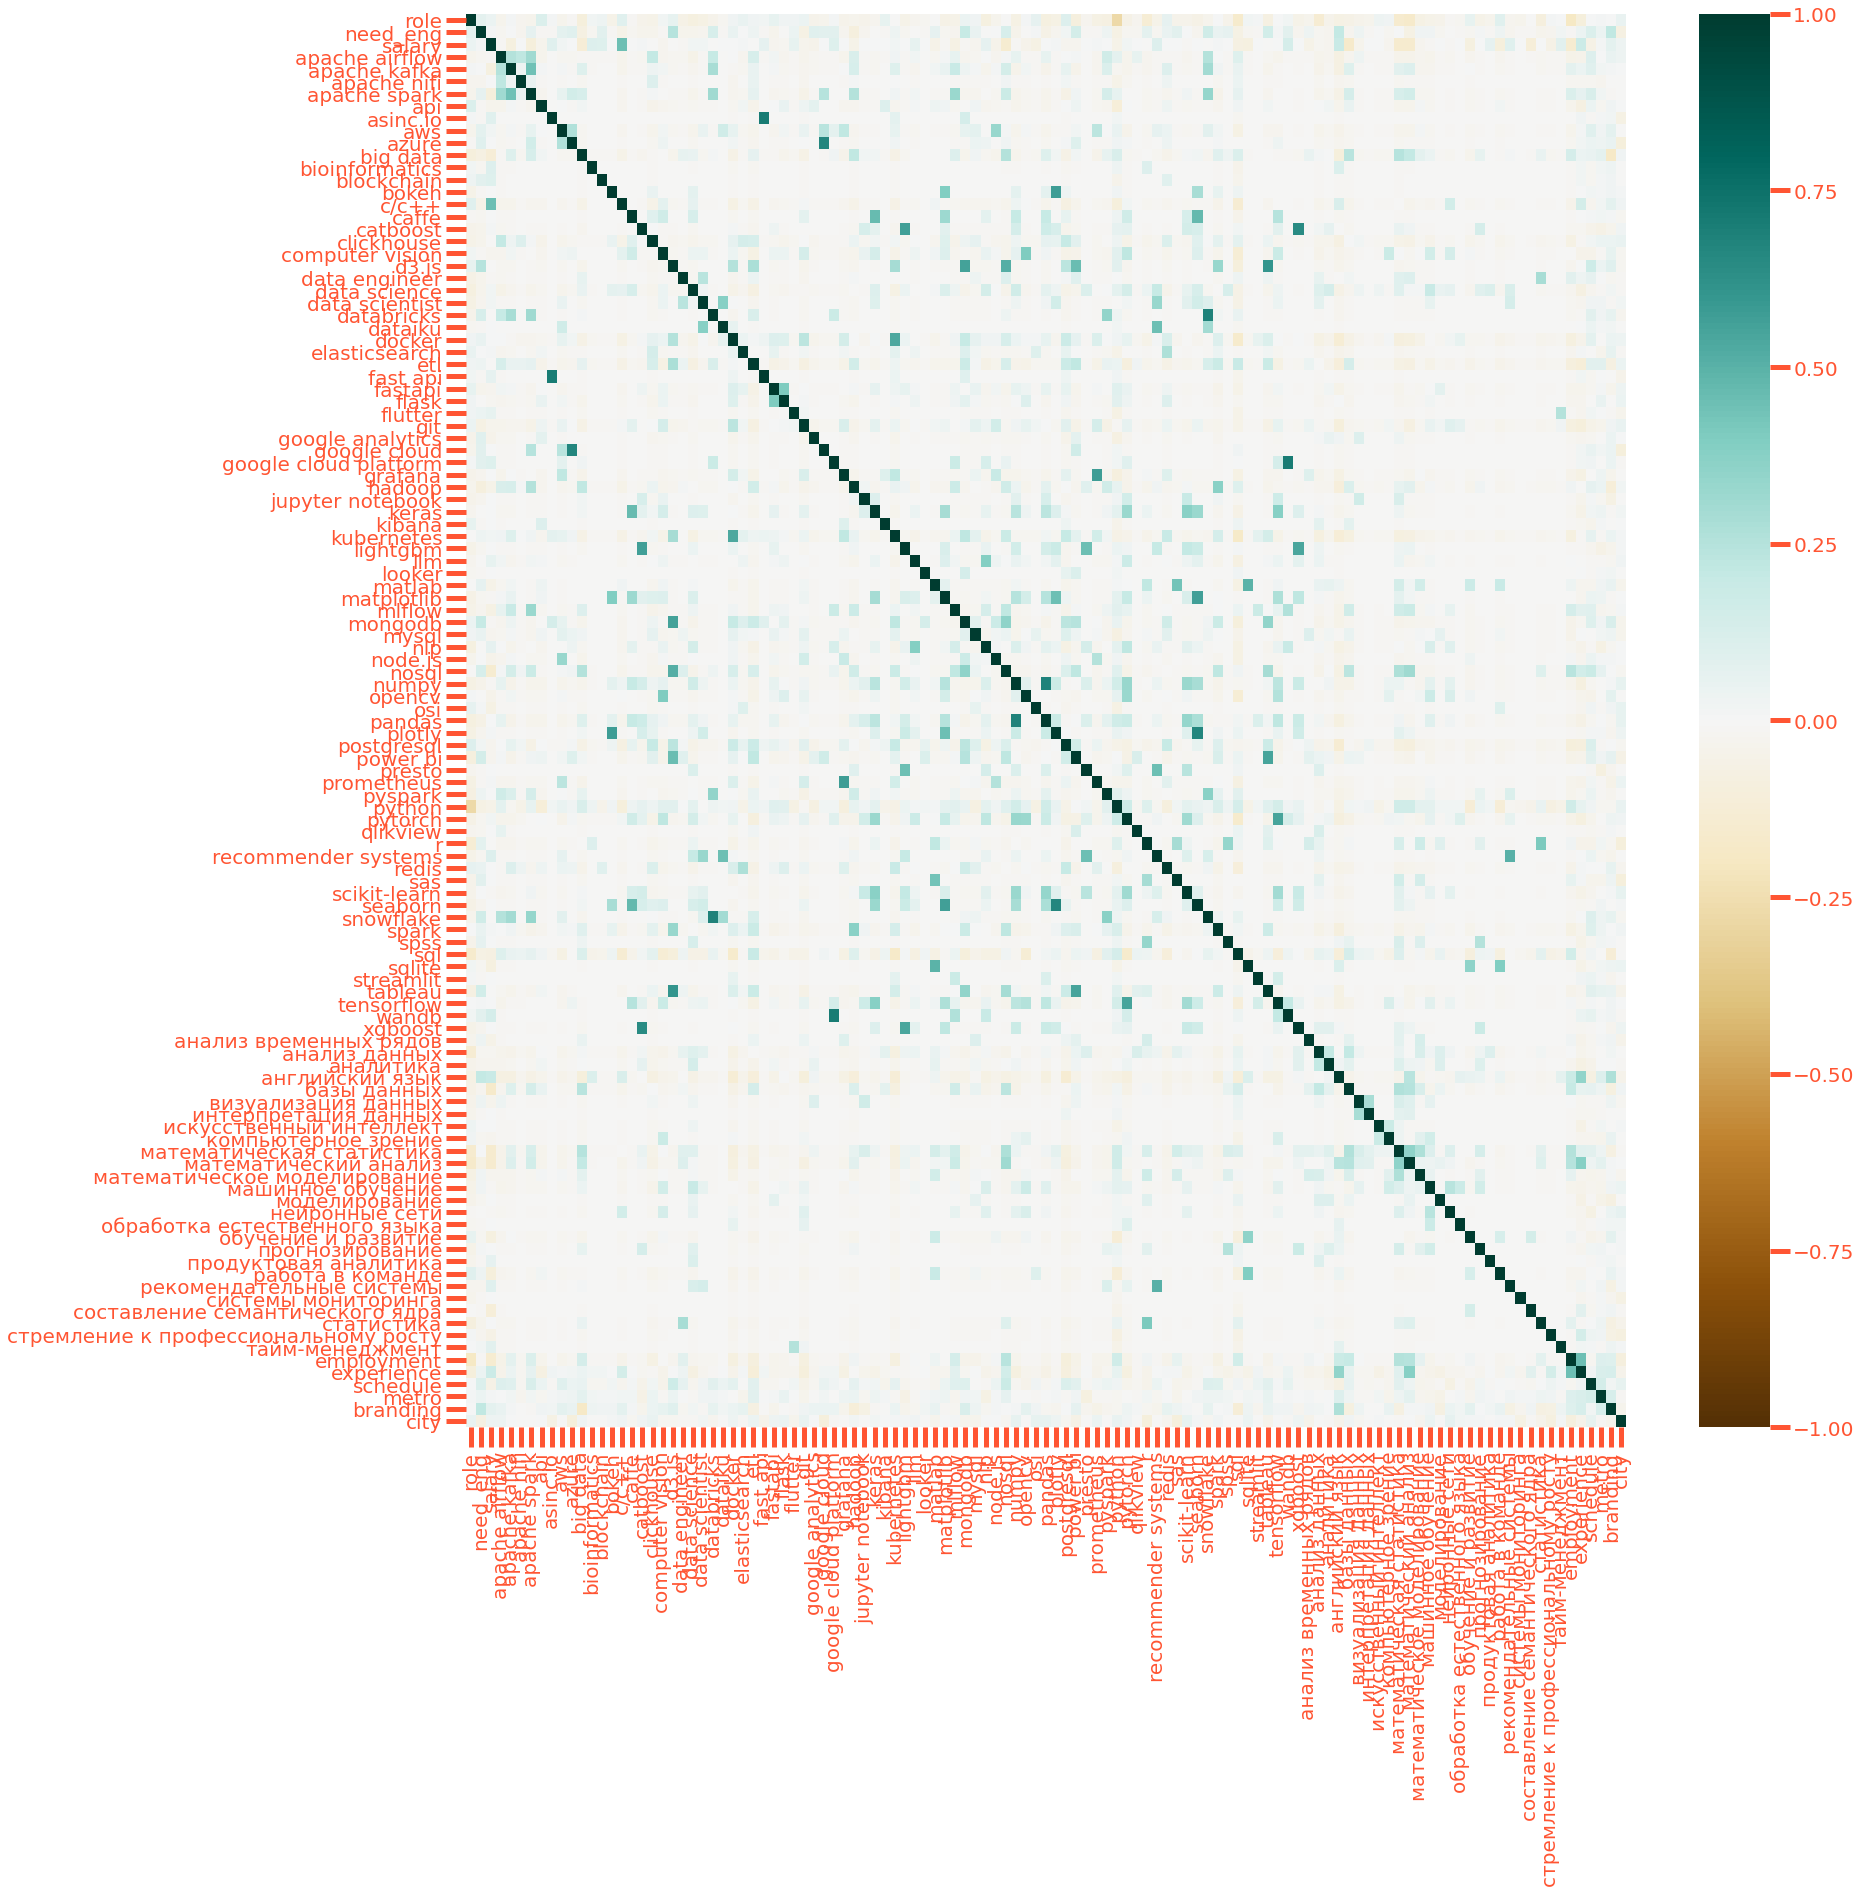

In [25]:
### Изобразим в виде Тепловой карты
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(26, 26)
sns.heatmap(df[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)
plt.show()

In [26]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
asinc.io               fast api        0.706894
google cloud platform  wandb           0.706680
databricks             snowflake       0.682176
numpy                  pandas          0.679857
azure                  google cloud    0.665659
plotly                 seaborn         0.665457
catboost               xgboost         0.643935
d3.js                  tableau         0.602530
bokeh                  plotly          0.576653
grafana                prometheus      0.576378
dtype: float64


In [27]:
print(df['salary'].describe())

count    1.660000e+03
mean     3.545297e+05
std      1.000836e+05
min      2.500000e+04
25%      3.545297e+05
50%      3.545297e+05
75%      3.545297e+05
max      1.119215e+06
Name: salary, dtype: float64


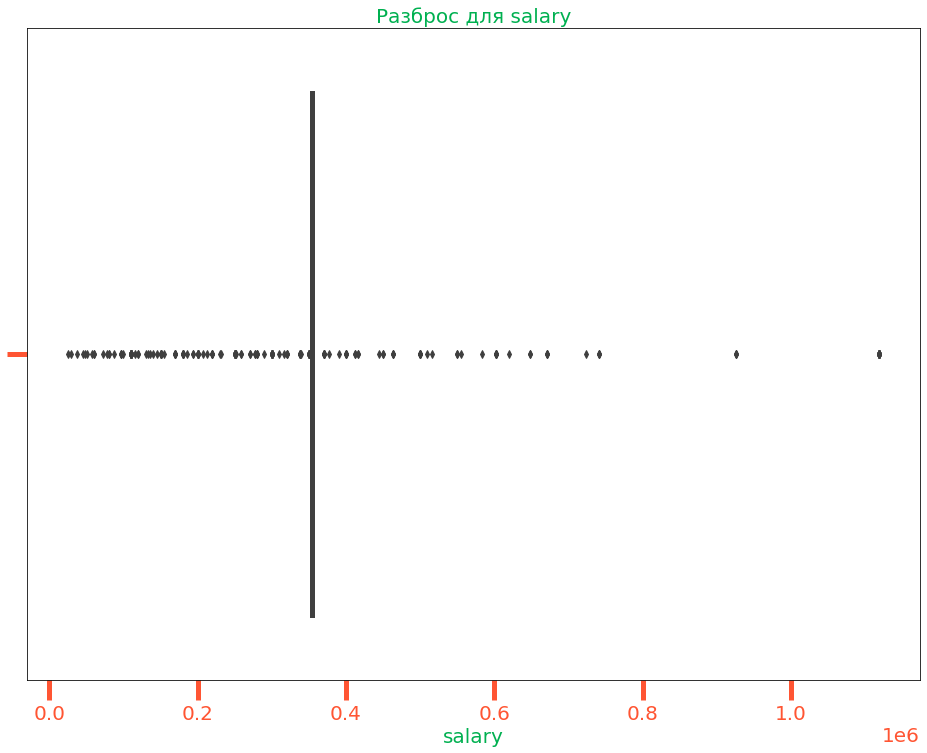

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.boxplot(x=df['salary'])
plt.title('Разброс для salary')
plt.show()

##### Уберем выбросы

In [29]:
print(df.shape)
df = df.drop('id', axis=True)

(1660, 117)


In [30]:
df

,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
0,24,0,1.119215e+06,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,113,2,80
1,30,0,9.671180e+04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,2,2
2,4,1,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,29,1,59
4,22,0,6.000000e+04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,113,1,81
5,24,0,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,113,2,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,26,0,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,2,59
3224,24,0,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,1,32
3226,0,0,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,113,1,59
3227,24,0,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
def render_report(df):    
    plt.figure(figsize=(16, 6))
    plt.bar(df['model'], df['mape'], color='orange')
    plt.title('MAPE models values')
    plt.xlabel('Model')
    plt.ylabel('MAPE')
    plt.xticks(fontsize='small')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16, 6))
    plt.bar(df['model'], df['inference_time'], color='green')
    plt.title('Inference time models values')
    plt.xlabel('Model')
    plt.ylabel('Inference time')
    plt.tight_layout()
    plt.xticks(fontsize='small')
    plt.show()

In [32]:
!pip install optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt


Y = df['salary']
X = df.drop(['salary'], axis=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [34]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
df.dtypes

role                int64
need_eng            int64
salary            float64
apache airflow      int64
apache kafka        int64
                   ...   
experience          int64
schedule            int64
metro               int64
branding            int64
city                int64
Length: 116, dtype: object

#### Попробуем обучить Catboost(MAPE) модель с подбором параметров

In [36]:
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    depth = trial.suggest_int('depth', 4, 10)
    iterations = trial.suggest_int('iterations', 100, 500)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1, 10)
    model = CatBoostRegressor(
        learning_rate=learning_rate,
        depth=depth,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,
        silent=True,
        loss_function='MAPE',
    )
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)
    y_pred = model.predict(X_test)

    return mape(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)


catboost_best_params = study.best_params
catboost_best_model = CatBoostRegressor(
    learning_rate=catboost_best_params['learning_rate'],
    depth=catboost_best_params['depth'],
    iterations=catboost_best_params['iterations'],
    l2_leaf_reg=catboost_best_params['l2_leaf_reg'],
    silent=True,
    loss_function='MAPE',
)

catboost_best_model.fit(X_train, y_train)
y_pred = catboost_best_model.predict(X_test)
mape = mape(y_test, y_pred)
avg_inference_time = timeit.timeit(lambda: catboost_best_model.predict(X_test), number=100) / 100
print(f"Лучшие параметры: {catboost_best_params}")
print(f'MAPE: {mape}')

Лучшие параметры: {'learning_rate': 0.23695445162113485, 'depth': 8, 'iterations': 292, 'l2_leaf_reg': 2.7505251966875126}
MAPE: 9.02014921505758


#### Посмотрим на рейтинг признаков

In [37]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(catboost_best_model, threshold='mean', prefit=True)
selected_features = selector.get_support(indices=True)

most_important_features = [X.columns[i] for i in selected_features]
print("Наиболее важные признаки:", most_important_features)

Наиболее важные признаки: ['apache spark', 'c/c++', 'tensorflow', 'wandb', 'английский язык', 'базы данных', 'работа в команде', 'рекомендательные системы', 'составление семантического ядра', 'employment', 'experience', 'schedule', 'city']


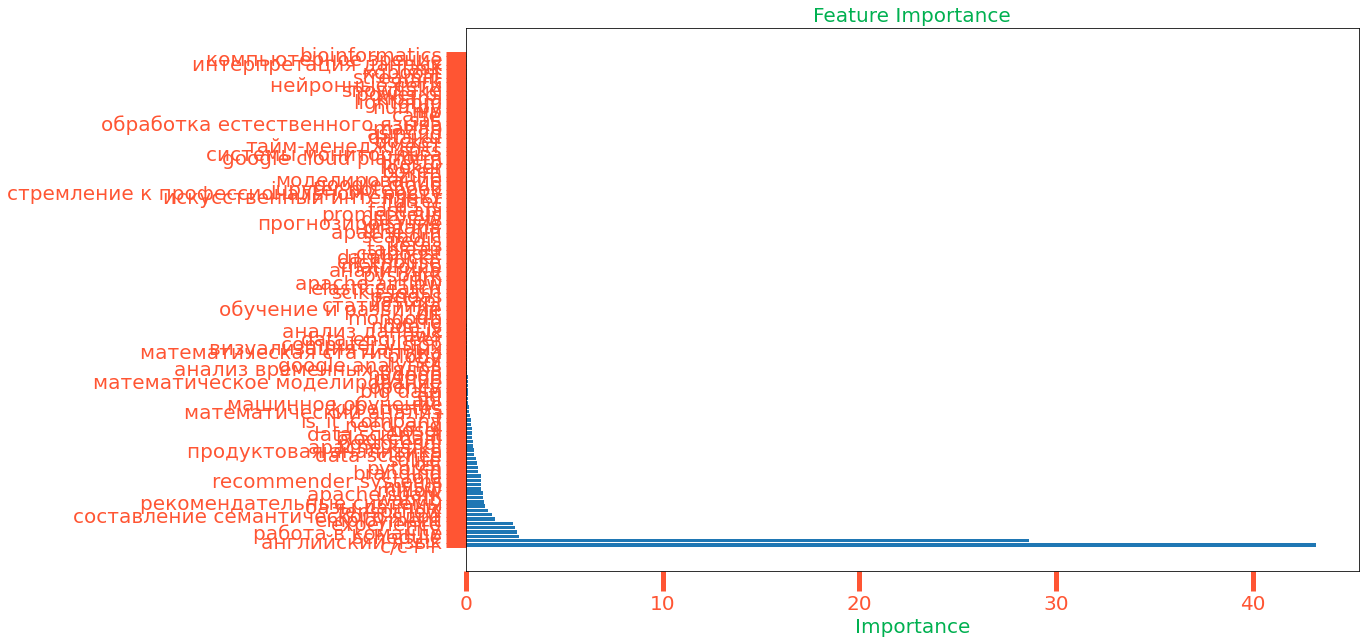

In [38]:
feature_importances = catboost_best_model.get_feature_importance()
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(16, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [39]:
imp_value = 0.05
low = importance_df[importance_df['Importance'] < imp_value]
high = importance_df[importance_df['Importance'] > imp_value]
print(f'Всего : {importance_df.shape[0]}')
print(f'Низкий показатель: {low.shape[0]}')
print(f'Высокий показатель : {high.shape[0]}')


Всего : 115
Низкий показатель: 66
Высокий показатель : 49


In [40]:
!pip install shap
import shap

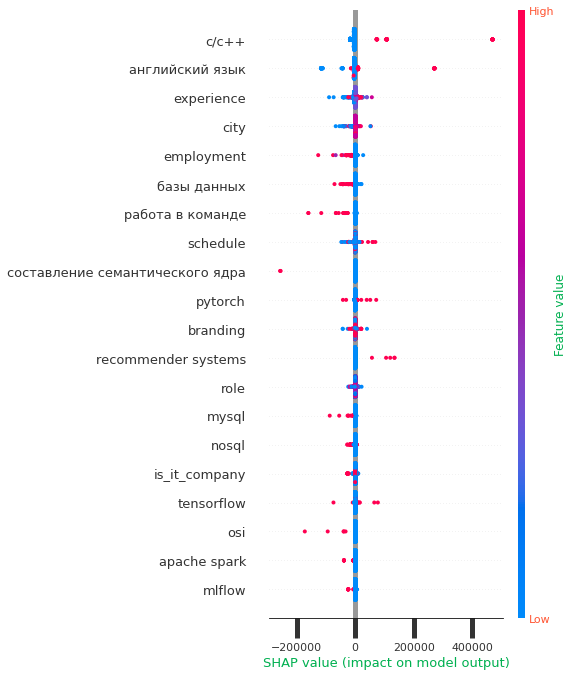

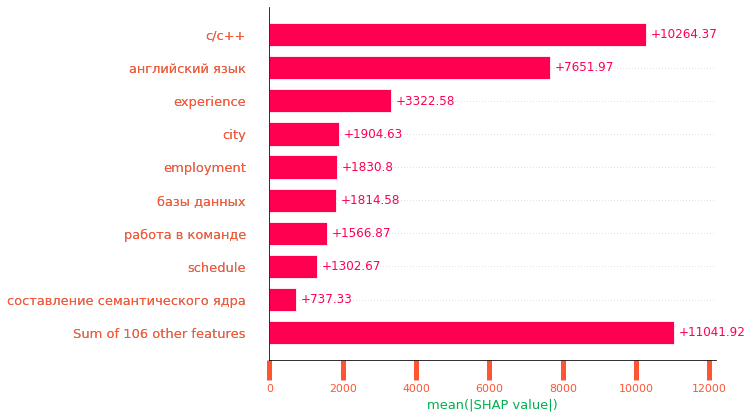

In [41]:
import shap

explainer = shap.Explainer(catboost_best_model)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)
shap.plots.bar(shap_values)

plt.show()

#### Попробуем обучить новую модель на признаках с важностью выше порога

In [42]:
df.head()

,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
0,24,0,1.119215e+06,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,113,2,80
1,30,0,9.671180e+04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,2,2
2,4,1,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,29,1,59
4,22,0,6.000000e+04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,113,1,81
5,24,0,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,113,2,59


In [43]:
imp_value = 0.6
low = importance_df[importance_df['Importance'] < imp_value]
high = importance_df[importance_df['Importance'] > imp_value]
print(f'Всего : {importance_df.shape[0]}')
print(f'Низкий показатель: {low.shape[0]}')
print(f'Высокий показатель : {high.shape[0]}')


Всего : 115
Низкий показатель: 96
Высокий показатель : 19


In [44]:
X_train_new = X_train.drop(list(low['Feature']), axis=True)
X_test_new = X_test.drop(list(low['Feature']), axis=True)


In [45]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    depth = trial.suggest_int('depth', 4, 10)
    iterations = trial.suggest_int('iterations', 100, 500)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1, 10)
    model = CatBoostRegressor(
        learning_rate=learning_rate,
        depth=depth,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,
        silent=True,
        loss_function='MAPE',
    )
    model.fit(X_train_new, y_train, eval_set=(X_test_new, y_test), verbose=0)
    y_pred = model.predict(X_test_new)

    return mape(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)


catboost_best_params_high = study.best_params
catboost_best_model_high = CatBoostRegressor(
    learning_rate=catboost_best_params_high['learning_rate'],
    depth=catboost_best_params_high['depth'],
    iterations=catboost_best_params_high['iterations'],
    l2_leaf_reg=catboost_best_params_high['l2_leaf_reg'],
    silent=True,
    loss_function='MAPE',
)

catboost_best_model_high.fit(X_train_new, y_train)
y_pred = catboost_best_model_high.predict(X_test_new)
mape = mape(y_test, y_pred)
avg_inference_time = timeit.timeit(lambda: catboost_best_model_high.predict(X_test_new), number=100) / 100
print(f"Лучшие параметры: {catboost_best_params_high}")
print(f'MAPE: {mape}')

Лучшие параметры: {'learning_rate': 0.20500276495078518, 'depth': 6, 'iterations': 425, 'l2_leaf_reg': 9.890759686029527}
MAPE: 9.017338886249323


In [46]:
catboost_best_model_high, catboost_best_model_high.get_params()

(<catboost.core.CatBoostRegressor at 0x7fc8b9c3cfa0>,
 {'iterations': 425,
  'learning_rate': 0.20500276495078518,
  'depth': 6,
  'l2_leaf_reg': 9.890759686029527,
  'loss_function': 'MAPE',
  'silent': True})

#### Попробуем обучить CatBoostRegressor c подбором параметров через HalvingGridSearchCV на всех признаках

In [52]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


In [64]:
Y = df['salary']
X = df.drop(['salary'], axis=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# def mape(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmsle(y_true, y_pred):
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))


model = CatBoostRegressor(loss_function='RMSE', verbose=0)
param_grid = {'depth': [3, 4, 5, 6],'learning_rate': [0.01, 0.1, 0.2], 'iterations': [100, 200, 300]}
search = HalvingGridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(rmsle, greater_is_better=False),
    factor=2,
    max_resources='auto',
    n_jobs=-1,
    cv=3
)
search.fit(X_train, y_train)

best_model_hgs = search.best_estimator_

y_pred = best_model_hgs.predict(X_test)
test_rmsle = rmsle(y_test, y_test_pred)
print(f"Лучшие параметры: {search.best_params_}")
print(f'RMSLE: {test_rmsle}')

Лучшие параметры: {'depth': 5, 'iterations': 200, 'learning_rate': 0.2}
RMSLE: 0.26054119219748284


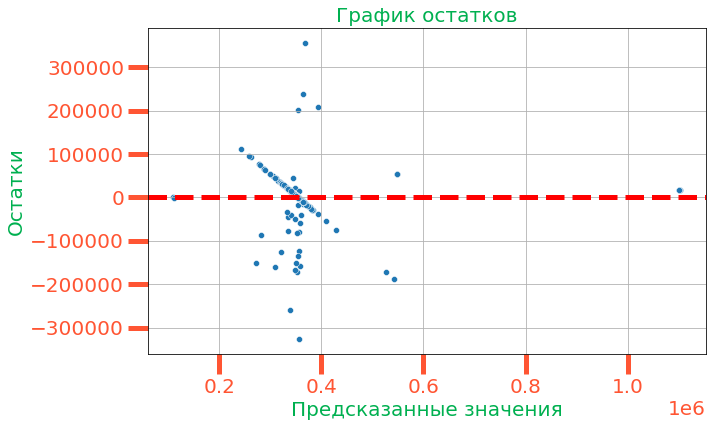

In [65]:
residuals = y_test - y_pred

# Построение графика остатков
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

#### Попробуем вернуться к первой модели GBR к поиску параметров через HalvingGridSearchCV на всех признаках

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)



In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание HalvingGridSearchCV
search = HalvingGridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(mape, greater_is_better=False),
    factor=2,
    max_resources='auto',
    n_jobs=-1,
    cv=3
)

search.fit(X_train, y_train)
best_model = search.best_estimator_
y_test_pred = best_model.predict(X_test)

test_mape = mape(y_test, y_test_pred)
print("Test MAPE: ", test_mape)

Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best MAPE:  13.062917145449232
Test MAPE:  10.550640464415508


#### Попробуем вернуться к первой модели GBR и к поиску параметров через GridSearchCV на всех признаках

In [74]:
model = GradientBoostingRegressor()

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mape = mape(y_test, y_pred)
print(f'MAPE: {mape}')

MAPE: 1214.5238485678524


In [79]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mape(y_test, y_pred)
print(f'MAPE: {mape}')

MAPE: 12.145238485678524


#### На большем кол-ве признаков не получается выбить лучшее качество

#### Попробуем добавить шума и обучим на наиболее важных признаках

In [80]:
df.head()

,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
0,24,0,1.119215e+06,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,113,2,80
1,30,0,9.671180e+04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,2,2
2,4,1,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,29,1,59
4,22,0,6.000000e+04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,113,1,81
5,24,0,3.545297e+05,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,113,2,59
